In [1]:
import gymnasium as gym
import numpy as np
import random
import time
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
desc=["SFF", "FHF", "FGF", "HFHF", "FFGF"]

env = gym.make('FrozenLake-v1', desc=desc, map_name="5x5", is_slippery=False, render_mode="human") 
observation, info = env.reset()

In [3]:
def calculate_percentage_change(old_q_table, new_q_table):
    """
    Calculate the percentage change in Q-values between two Q-tables.

    Parameters:
        old_q_table (numpy.ndarray): The old Q-table.
        new_q_table (numpy.ndarray): The new Q-table.

    Returns:
        float: The percentage change in Q-values.
    """
    q_diff = np.abs(new_q_table - old_q_table)
    avg_change = np.mean(q_diff)
    old_avg = np.mean(old_q_table)
    return (avg_change / old_avg) * 100

In [4]:
# Define parameters
gamma = 0.9  # Discount factor
alpha = 0.1  # Learning rate
epsilon = 0.01  # Epsilon-greedy parameter
num_episodes = 1000

# Initialize Q-values
num_states = env.observation_space.n
num_actions = env.action_space.n
Q = np.zeros((num_states, num_actions))

statistics = pd.DataFrame({
    "Time": [],
    "Episode": [],
    "Q-Difference": [],
    "GotGift": []
})

# SARSA
start_time = time.time()
for episode in range(num_episodes):
    state = env.reset()[0]
    done = False
    
    gotGift = False
    
    steps = []
    
    arr_copy = Q.copy()
    
    # Choose initial action
    if np.random.rand() < epsilon:
        action = env.action_space.sample()  # Random action
    else:
        action = np.argmax(Q[state])  # Greedy action
    
    while not done:
        
        
        # Take action and observe next state and reward
        steps.append(action)
        step = env.step(action)
        next_state = step[0]
        reward = step[1]
        done = step[2]
        
        if reward == 0 and done:
            reward = -1
        elif next_state == state:
            reward = -1
            
        # Epsilon-greedy action selection
        if np.random.rand() < epsilon:
            next_action = env.action_space.sample()  # Random action
        else:
            next_action = np.argmax(Q[next_state])  # Greedy action
        
        # SARSA update rule
        Q[state, action] += alpha * (reward + gamma * Q[next_state, next_action] - Q[state, action])
        
        if reward == 1:
            print("Hit gift! At Episode: "+str(episode +1))
            print("Steps: ")
            print(steps)
            gotGift = True
            end_time = time.time()
            elapsed_time = end_time - start_time
            print("Elapsed time:", elapsed_time, "seconds")
            
        
        # Move to next state
        state = next_state
        action = next_action
        
    change = calculate_percentage_change(arr_copy, Q)
    end_time = time.time()
    elapsed_time = end_time - start_time
    
    statistics.loc[episode] = {
        "Time": elapsed_time,
        "Episode": episode+1,
        "Q-Difference": -change,
        "GotGift": gotGift
    }
    
    print(change)
    if change == 0:
        print("breaking")
        break

# Optimal policy
optimal_policy = np.argmax(Q, axis=1)

print("Optimal policy:")
print(optimal_policy)


Hit gift! At Episode: 1
Steps: 
[0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 2]
Elapsed time: 3.185002088546753 seconds
inf


C:\Users\greyes11\AppData\Local\Temp\ipykernel_15428\1108856074.py:15: RuntimeWarning: divide by zero encountered in double_scalars
  return (avg_change / old_avg) * 100


Hit gift! At Episode: 2
Steps: 
[1, 1, 2]
Elapsed time: 4.176948308944702 seconds
-15.0
Hit gift! At Episode: 3
Steps: 
[1, 1, 2]
Elapsed time: 5.1674933433532715 seconds
-17.470588235294123
Hit gift! At Episode: 4
Steps: 
[1, 1, 2]
Elapsed time: 6.159151315689087 seconds
-20.94148901704141
Hit gift! At Episode: 5
Steps: 
[1, 1, 2]
Elapsed time: 7.149995565414429 seconds
-26.16993549761907
Hit gift! At Episode: 6
Steps: 
[1, 1, 2]
Elapsed time: 8.142059087753296 seconds
-34.96061313842686
Hit gift! At Episode: 7
Steps: 
[1, 1, 2]
Elapsed time: 9.13375997543335 seconds
-52.91309653854035
Hit gift! At Episode: 8
Steps: 
[1, 1, 2]
Elapsed time: 10.125552415847778 seconds
-110.38266483369617
Hit gift! At Episode: 9
Steps: 
[1, 1, 2]
Elapsed time: 11.11631965637207 seconds
1041.9923176190257
Hit gift! At Episode: 10
Steps: 
[1, 1, 2]
Elapsed time: 12.10607647895813 seconds
89.22549136521704
Hit gift! At Episode: 11
Steps: 
[1, 1, 2]
Elapsed time: 13.096965074539185 seconds
46.00546887836449

KeyboardInterrupt: 

In [5]:
Q

array([[-0.19      ,  0.77021419,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [-0.19      ,  0.88867884,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [-0.19      , -0.19      ,  0.99838269,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ]])

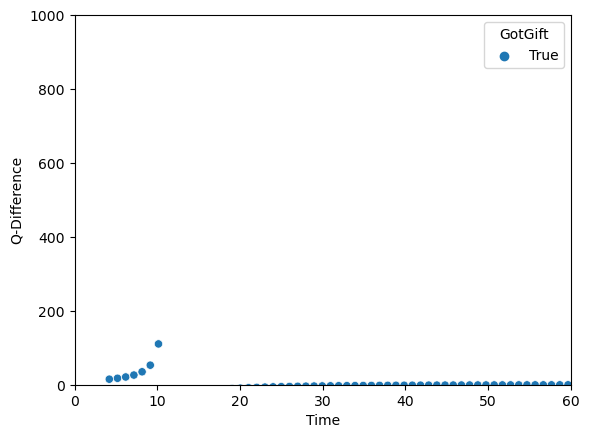

In [10]:
# Create the scatter plot
sns.scatterplot(data=statistics, x="Time", y="Q-Difference", hue="GotGift")

# Set the limits of x and y axes
plt.ylim(0, 1000)
plt.xlim(0, 60)
# Show the plot
plt.show()